# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [3]:
# Your code here - Manipulate column names
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [4]:
df.columns = [col_formatting(col) for col in df.columns]
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Columns: 103 entries, piece_count to review_difficulty_unknown
dtypes: float64(6), int64(97)
memory usage: 8.5 MB


In [6]:
# Your code here - Define the target and predictors
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [7]:
# Your code here - Split into train and test
train, test = train_test_split(df)
print(len(train), len(test))
train.head()

8152 2718


,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
3268,-0.105793,50.8980,-0.370585,-1.178084,-1.082024,-0.847850,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5654,0.229862,103.6390,-0.426440,0.216064,0.990651,0.117830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10747,-0.532882,12.1878,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3422,1.758960,243.7800,-0.426440,1.087407,0.990651,1.244458,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4803,0.493334,89.8800,-0.286801,0.738870,0.576116,0.761617,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
test.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
6921,1.145396,195.9860,0.048333,0.390333,0.161581,0.600671,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9406,-0.300690,48.7878,0.048333,-0.306741,-0.667489,0.278777,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
451,-0.605066,88.9900,-0.286801,-0.655279,-0.460222,-1.974478,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
9222,-0.383702,36.5878,-0.203018,-0.829547,-1.289292,-0.043117,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8600,-0.561756,45.3700,-0.426440,1.087407,0.990651,1.244458,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
# Your code here - Fit the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     550.2
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:49:02   Log-Likelihood:                -40599.
No. Observations:                8152   AIC:                         8.139e+04
Df Residuals:                    8057   BIC:                         8.205e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                         1.022e+13   2.19e+13      0.467      0.640   -3.27e+13    5.31e+13
piece_count                                         74.9214      0.909     82.414      0.000      73.139      76.703
num_reviews                                          6.2272      0.673      9.258      0.000       4.909       7.546
play_star_rating                                     5.2657      0.639      8.240      0.000       4.013       6.518
star_rating                                         -1.4140      0.725     -1.952      0.051      -2.834       0.006
val_star_rating                                     -8.5056      0.641    -13.272      0.000      -9.762      -7.249
ages_10plus                                      -2.042e+10   4.37e+10     -0.467      0.640   -1.06e+11    6.53e+10
ages_10_14                                       -2.042e+10   4.37e+10     -0.467      0.640   -1.06e+11    6.53e+10
ages_10_16                                       -2.042e+10   4.37e+10     -0.467      0.640   -1.06e+11    6.53e+10
ages_10_21                                       -2.042e+10   4.37e+10     -0.467      0.640   -1.06e+11    6.53e+10
ages_11_16                                       -2.042e+10   4.37e+10     -0.467      0.640   -1.06e+11    6.53e+10
ages_12plus                                      -2.042e+10   4.37e+10     -0.467      0.640   -1.06e+11    6.53e+10
ages_12_16                                       -2.042e+10   4.37e+10     -0.467      0.640   -1.06e+11    6.53e+10
ages_14plus                                      -2.042e+10   4.37e+10     -0.467      0.640   -1.06e+11    6.53e+10
ages_16plus                                      -2.042e+10   4.37e+10     -0.467      0.640   -1.06e+11    6.53e+10
ages_1half_3                                       1.12e+11    2.4e+11      0.467      0.640   -3.58e+11    5.82e+11
ages_1half_5                                       1.12e+11    2.4e+11      0.467      0.640   -3.58e+11    5.82e+11
ages_2_5                                           1.12e+11    2.4e+11      0.467      0.640   -3.58e+11    5.82e+11
ages_4plus                                        8.735e+09   1.87e+10      0.467      0.640   -2.79e+10    4.54e+10
ages_4_7                                          4.814e+10   1.03e+11      0.467      0.640   -1.54e+11     2.5e+11
ages_4_99                                         8.735e+09   1.87e+10      0.467      0.640   -2.79e+10    4.54e+10
ages_5plus                                        4.499e+10   9.63e+10      0.467      0.640   -1.44e+11    2.34e+11
ages_5_12                                        -2.042e+10   4.37e+10     -0.467      0.640   -1.06e+11    6.53e+10
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [10]:
# Your code here - Remove features which do not appear to be statistically relevant
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 4
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,1.022e+13,2.19e+13,0.467,0.640,-3.27e+13,5.31e+13
piece_count,74.9214,0.909,82.414,0.000,73.139,76.703
num_reviews,6.2272,0.673,9.258,0.000,4.909,7.546
play_star_rating,5.2657,0.639,8.240,0.000,4.013,6.518
star_rating,-1.4140,0.725,-1.952,0.051,-2.834,0.006


In [11]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     6259.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:49:24   Log-Likelihood:                -43044.
No. Observations:                8152   AIC:                         8.610e+04
Df Residuals:                    8147   BIC:                         8.613e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           67.4204      0.527    128.047      0.000      66.388      68.453
piece_count         85.6455      0.627    136.552      0.000      84.416      86.875
num_reviews         -4.4074      0.620     -7.111      0.000      -5.622      -3.192
play_star_rating     7.5656      0.618     12.235      0.000       6.353       8.778
val_star_rating    -14.8056      0.607    -24.374      0.000     -15.996     -13.615
==============================================================================
Omnibus:                     8732.616   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           990941.469
Skew:                           5.267   Prob(JB):                         0.00
Kurtosis:                      55.976   Cond. No.                         1.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [12]:
# Your code here - Continue to refine the model
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

5 4
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,67.4204,0.527,128.047,0.0,66.388,68.453
piece_count,85.6455,0.627,136.552,0.0,84.416,86.875
num_reviews,-4.4074,0.620,-7.111,0.0,-5.622,-3.192
play_star_rating,7.5656,0.618,12.235,0.0,6.353,8.778
val_star_rating,-14.8056,0.607,-24.374,0.0,-15.996,-13.615


In [13]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     6259.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:51:36   Log-Likelihood:                -43044.
No. Observations:                8152   AIC:                         8.610e+04
Df Residuals:                    8147   BIC:                         8.613e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           67.4204      0.527    128.047      0.000      66.388      68.453
piece_count         85.6455      0.627    136.552      0.000      84.416      86.875
num_reviews         -4.4074      0.620     -7.111      0.000      -5.622      -3.192
play_star_rating     7.5656      0.618     12.235      0.000       6.353       8.778
val_star_rating    -14.8056      0.607    -24.374      0.000     -15.996     -13.615
==============================================================================
Omnibus:                     8732.616   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           990941.469
Skew:                           5.267   Prob(JB):                         0.00
Kurtosis:                      55.976   Cond. No.                         1.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [14]:
# Your code here - Code a way to identify multicollinearity
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('piece_count', 1.4354381636116413),
 ('num_reviews', 1.4387212769032394),
 ('play_star_rating', 1.320390289596555),
 ('val_star_rating', 1.3178494728336774)]

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [15]:
# Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

4 4


In [16]:
# Your code here - Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     6259.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:53:16   Log-Likelihood:                -43044.
No. Observations:                8152   AIC:                         8.610e+04
Df Residuals:                    8147   BIC:                         8.613e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           67.4204      0.527    128.047      0.000      66.388      68.453
piece_count         85.6455      0.627    136.552      0.000      84.416      86.875
num_reviews         -4.4074      0.620     -7.111      0.000      -5.622      -3.192
play_star_rating     7.5656      0.618     12.235      0.000       6.353       8.778
val_star_rating    -14.8056      0.607    -24.374      0.000     -15.996     -13.615
==============================================================================
Omnibus:                     8732.616   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           990941.469
Skew:                           5.267   Prob(JB):                         0.00
Kurtosis:                      55.976   Cond. No.                         1.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

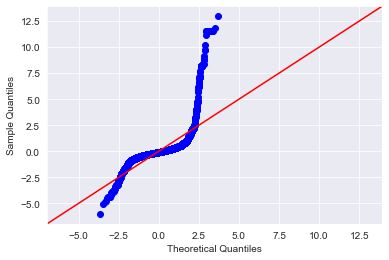

In [17]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

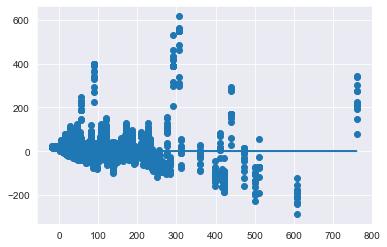

In [18]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

<AxesSubplot:>

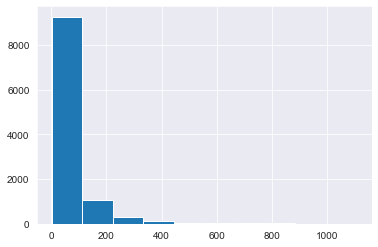

In [19]:
# Your code here - Check for outliers
df.list_price.hist()

In [20]:
# Your code here
# Remove extreme outliers
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

# Rerun the model
orig_tot = len(df)
df = df[df.list_price < 450] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878
Percent removed: 0.010487580496780129


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     2477.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:55:11   Log-Likelihood:                -7403.4
No. Observations:                8067   AIC:                         1.482e+04
Df Residuals:                    8062   BIC:                         1.485e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.7042      0.007    548.044      0.000       3.691       3.717
piece_count          0.7740      0.009     86.350      0.000       0.756       0.792
num_reviews         -0.0238      0.008     -2.967      0.003      -0.040      -0.008
play_star_rating     0.1468      0.008     19.191      0.000       0.132       0.162
val_star_rating     -0.1946      0.008    -25.109      0.000      -0.210      -0.179
==============================================================================
Omnibus:                      433.476   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              544.551
Skew:                          -0.538   Prob(JB):                    5.65e-119
Kurtosis:                       3.680   Cond. No.                         1.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

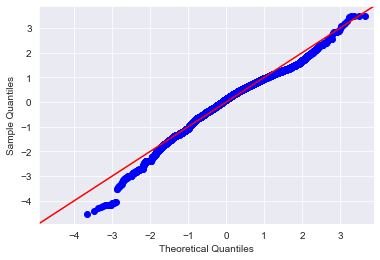

In [21]:
# Your code here - Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

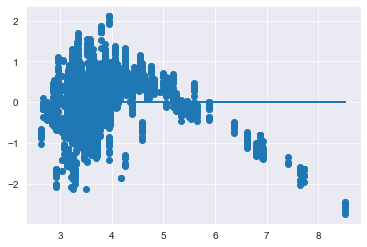

In [22]:
# Your code here - Check the Homoscedasticity Assumption
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 percentile: 4.447203233446613
0.81 percentile: 4.512971560274537
0.82 percentile: 4.542526402035123
0.83 percentile: 4.580752485605895
0.84 percentile: 4.640913706863106
0.85 percentile: 4.6985494117910225
0.86 percentile: 4.718373863481943
0.87 percentile: 4.787408405976297
0.88 percentile: 4.8039210397329235
0.89 percentile: 4.826327766567244
0.9 percentile: 4.89924031131419
0.91 percentile: 4.976713742220571
0.92 percentile: 5.0490223265009595
0.93 percentile: 5.140421850231899
0.94 percentile: 5.209419483952433
0.95 percentile: 5.292263579298989
0.96 percentile: 5.391752152536553
0.97 percentile: 5.528952783620542
0.98 percentile: 5.678340376637527
0.99 percentile: 5.873347331375852


<AxesSubplot:>

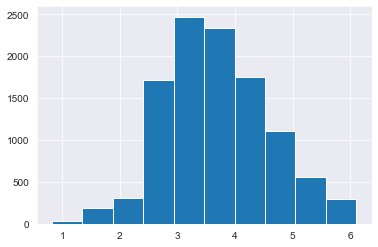

In [23]:
# Your code goes here
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

df.list_price.hist()

In [24]:
df = df[df.list_price <= 6]
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     2540.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:56:10   Log-Likelihood:                -7139.1
No. Observations:                8027   AIC:                         1.429e+04
Df Residuals:                    8022   BIC:                         1.432e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.7203      0.007    563.817      0.000       3.707       3.733
piece_count          0.8310      0.009     87.570      0.000       0.812       0.850
num_reviews         -0.0362      0.008     -4.400      0.000      -0.052      -0.020
play_star_rating     0.1413      0.007     18.968      0.000       0.127       0.156
val_star_rating     -0.1971      0.008    -26.171      0.000      -0.212      -0.182
==============================================================================
Omnibus:                      634.114   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              945.250
Skew:                          -0.632   Prob(JB):                    5.51e-206
Kurtosis:                       4.108   Cond. No.                         2.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

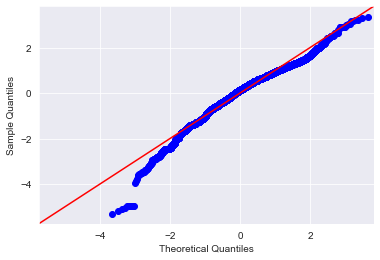

In [25]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

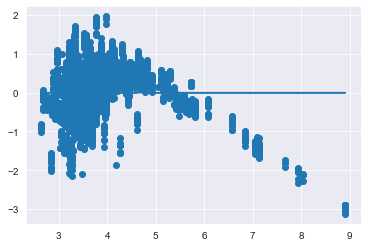

In [26]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [27]:
x_cols = ['piece_count', 'country_US']
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     4392.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:57:45   Log-Likelihood:                -7455.4
No. Observations:                8027   AIC:                         1.492e+04
Df Residuals:                    8024   BIC:                         1.494e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7354      0.007    525.701      0.000       3.721       3.749
piece_count     0.7856      0.008     93.022      0.000       0.769       0.802
country_US     -0.2615      0.027     -9.668      0.000      -0.315      -0.208
==============================================================================
Omnibus:                      497.145   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              763.258
Skew:                          -0.516   Prob(JB):                    1.82e-166
Kurtosis:                       4.102   Cond. No.                         4.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

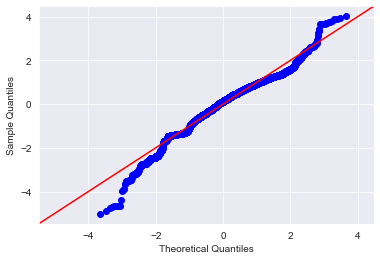

In [28]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

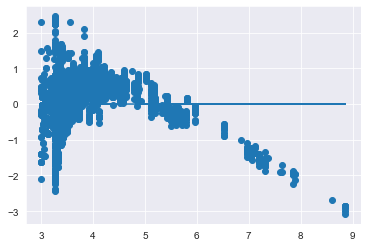

In [29]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 